# SAXS&WAXS pipeline for data analysis, specifically get S(Q) curves


## Overview

* Setup: load packages/setup path
* Load and check form factors from h5 files (genreated by data reduction pipeline) 
* Load and check scattering curves from h5 files (genreated by data reduction pipeline) 
* Get Sq for one data
* Find the interested dataset and do batch analysis
* Produce images (png format)
* Append the (q,sq) results to a hdf file 
 

### DEV
* V0: Initialize the pipeline (2019/10/26 by YG yuzhang@bnl.gov)
* V1: Develop the pyScatt package  


 

## TODLIST

* 1): Put codes into a package (Done)



# Load Package

In [1]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })

# Setup Paths

In [2]:
####
inDir = '/home/yuzhang/XScattering/CFN_SAXS_Template/Results/'
outDir = '/home/yuzhang/XScattering/CFN_SAXS_Template/Results/' 

# Check H5 Filenames in inDir

In [3]:
flist_all = ls_dir( outDir, have_list=['.h5'])
print( len(flist_all))
print(flist_all)

14
['FL_1024Morn_F1_x0.100_y0.150_0.10s_2605949_saxs.tiff.h5' 'test.h5'
 'Sq_FL_1024Morn_F1_x0.100_y0.150_0.10s_2605949_saxs.tiff.h5.png'
 'Sq_FL_1024Morn_F1_x0.100_y0.150_0.10s_2605950_saxs.tiff.h5.png'
 'f3b03825-edfa-43f3-b333_000003.tiff.h5'
 'FL_1026Morn_F2_x0.000_y0.000_1.00s_2607309_saxs.tiff.h5'
 'SAXS_setup_pargs_test.h5'
 'FL_1024Morn_F1_x0.100_y0.150_0.10s_2605950_saxs.tiff.h5'
 'f3b03825-edfa-43f3-b333_000001.tiff.h5'
 'f3b03825-edfa-43f3-b333_000002.tiff.h5'
 'Sq_f3b03825-edfa-43f3-b333_000001.tiff.h5.png'
 'WAXS_setup_pargs_test.h5'
 'Sq_FL_1026Morn_F2_x0.000_y0.000_1.00s_2607309_saxs.tiff.h5.png'
 'FL_1024Ngt_10nmSP_Form_Factor_x-0.900_y-0.400_5.00s_2606361_saxs.tiff.h5']


In [4]:
#%run -i ~/pyScatt_link/pyScatt/saxs.py

# Setup SQ Data Analysis Parameters Using One Data

## 1) check form factor 

In [5]:
flist = ls_dir( inDir, have_list=['Form_Factor', '10nm', 'h5'], exclude_list=['png', 'csv', '0.04s'])
print(flist)

['FL_1024Ngt_10nmSP_Form_Factor_x-0.900_y-0.400_5.00s_2606361_saxs.tiff.h5']


In [6]:
form_factor_filename = inDir + 'FL_1024Ngt_10nmSP_Form_Factor_x-0.900_y-0.400_5.00s_2606361_saxs.tiff.h5'

In [7]:
img, q_pq, pq, phi, iphi, sqphi, qs, phis, md_pq = load_saxs_h5_res( form_factor_filename )  

/home/yuzhang/Repos/pyScatt/pyScatt/IO.py:137: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if md.attrs[k] == 'None':


<IPython.core.display.Javascript object>


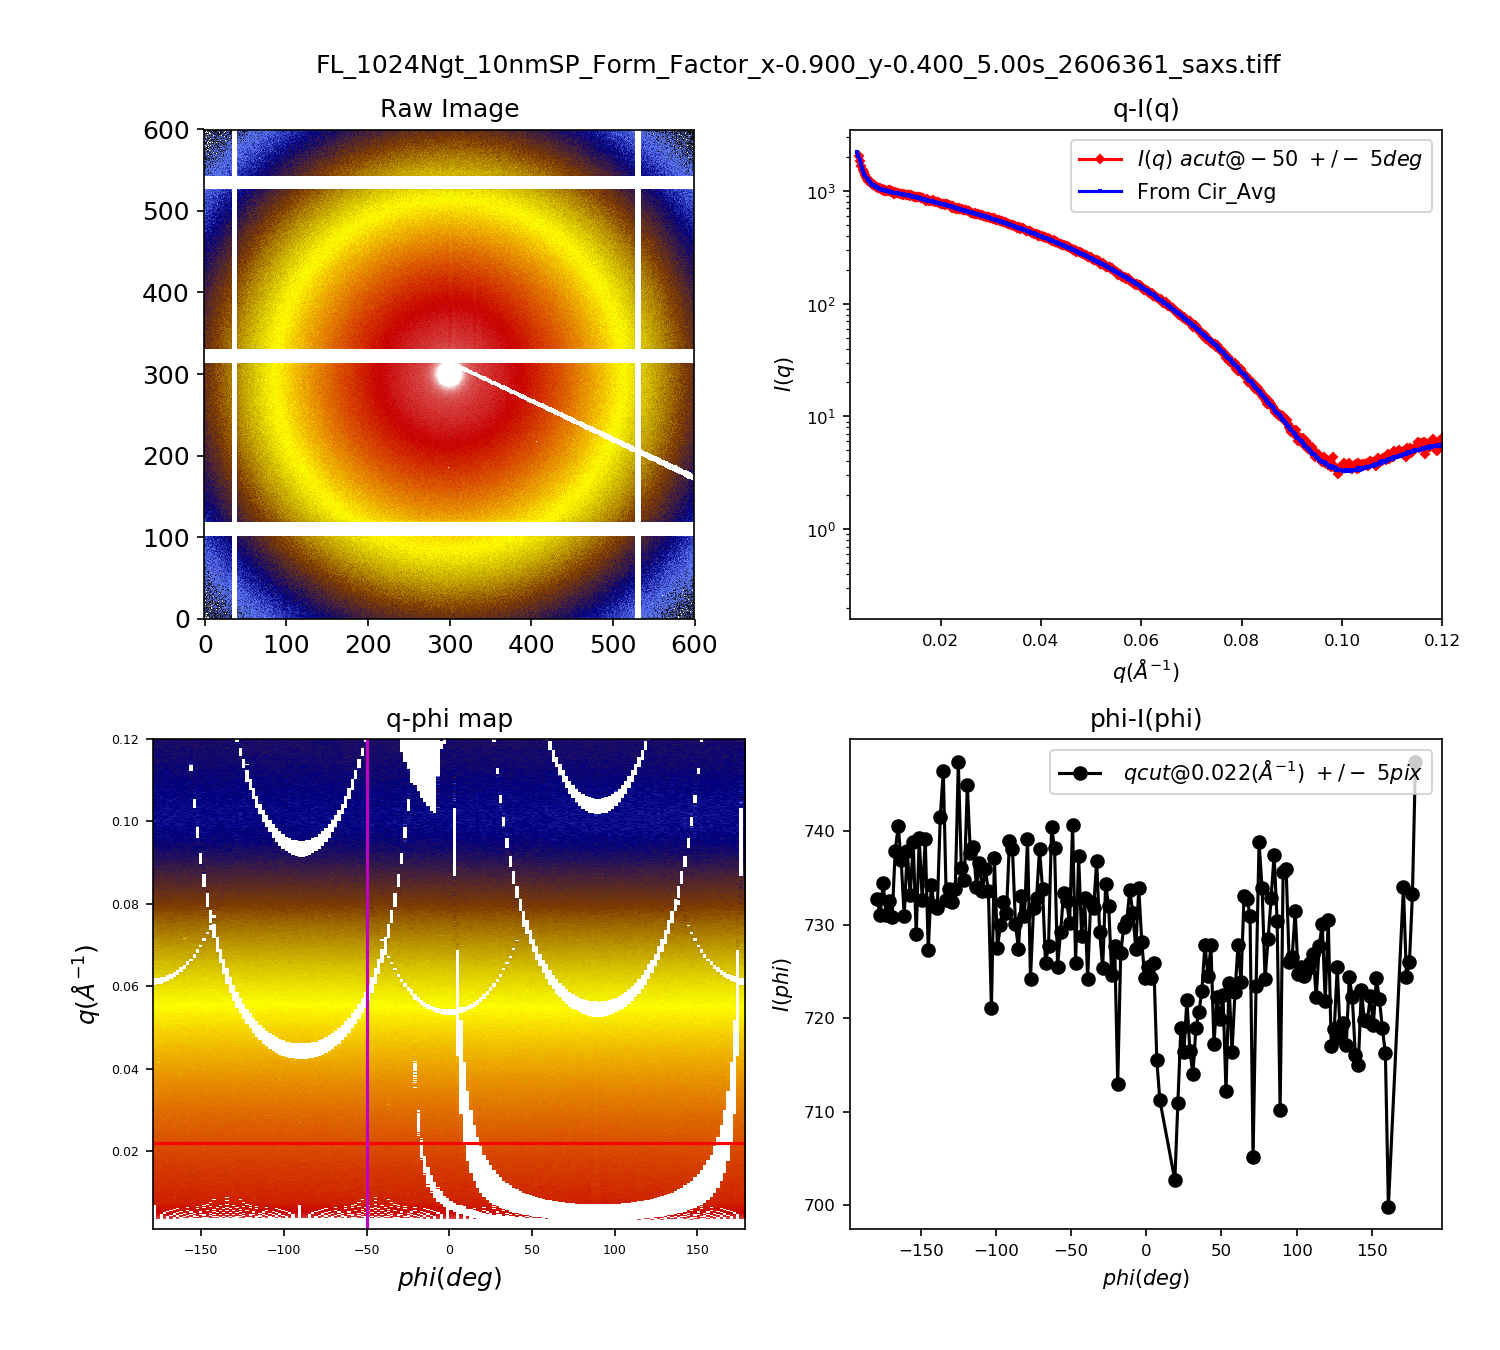

/home/yuzhang/conda_envs/pyScattering/lib/python3.7/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


In [8]:
Plot_SAXS_Data_Reduction( md_pq['fout']  ) 

### Check multi form factors if needed

In [9]:
print(flist)

['FL_1024Ngt_10nmSP_Form_Factor_x-0.900_y-0.400_5.00s_2606361_saxs.tiff.h5']


<IPython.core.display.Javascript object>


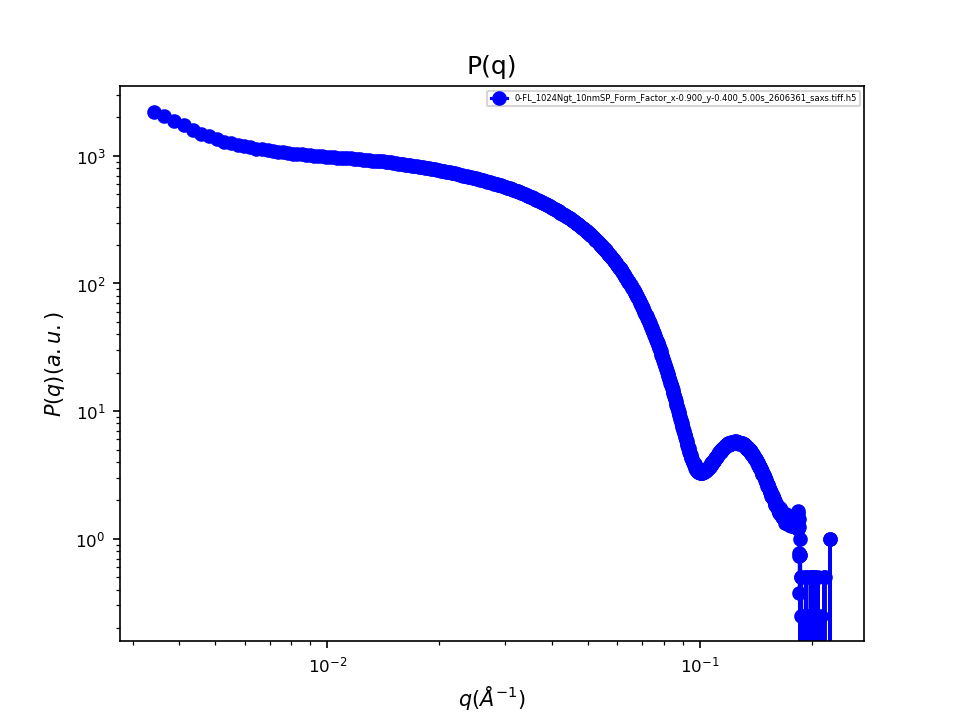

0 FL_1024Ngt_10nmSP_Form_Factor_x-0.900_y-0.400_5.00s_2606361_saxs.tiff.h5
dict_keys(['iphib_saxs', 'iq_saxs', 'iqb_saxs', 'md', 'phi_qphi_saxs', 'phib_saxs', 'q_qphi_saxs', 'q_saxs', 'qb_saxs', 'qphi_saxs', 'raw_saxs'])


Text(0.5, 1.0, 'P(q)')

In [10]:
fig, ax = plt.subplots()
i=0
for fp in flist:     
    print(i, fp)
    img, q, pq, phi, iphi, sqphi, qs, phis, md = load_saxs_h5_res( inDir + fp, verbose=True )      
    plot1D(x=q,y=  pq  , ax=ax, logy= True, legend_size= 4,
           c= colors[i], m= markers[i], legend='%s-%s'%(i,fp )  )
    i += 1    
ax.set_xscale('log')
ax.set_xlabel( r'$q (\AA^{-1})$')
ax.set_ylabel(r'$P(q) (a.u.)$')
ax.set_title( 'P(q)')

## 2) Check One Scattering Data

In [11]:
flist = ls_dir( inDir, have_list=['f3b', 'h5'], exclude_list=['png', 'csv' ])
print(len(flist))
print(flist)

3
['f3b03825-edfa-43f3-b333_000003.tiff.h5'
 'f3b03825-edfa-43f3-b333_000001.tiff.h5'
 'f3b03825-edfa-43f3-b333_000002.tiff.h5']


In [12]:
fp = 'f3b03825-edfa-43f3-b333_000001.tiff.h5' 
img, q, iq, phi, iphi, sqphi, qs, phis, md = load_saxs_h5_res(  inDir + fp   )
if len(q)!=len(q_pq):
    pq=np.interp( q, q_pq, pq)

<IPython.core.display.Javascript object>


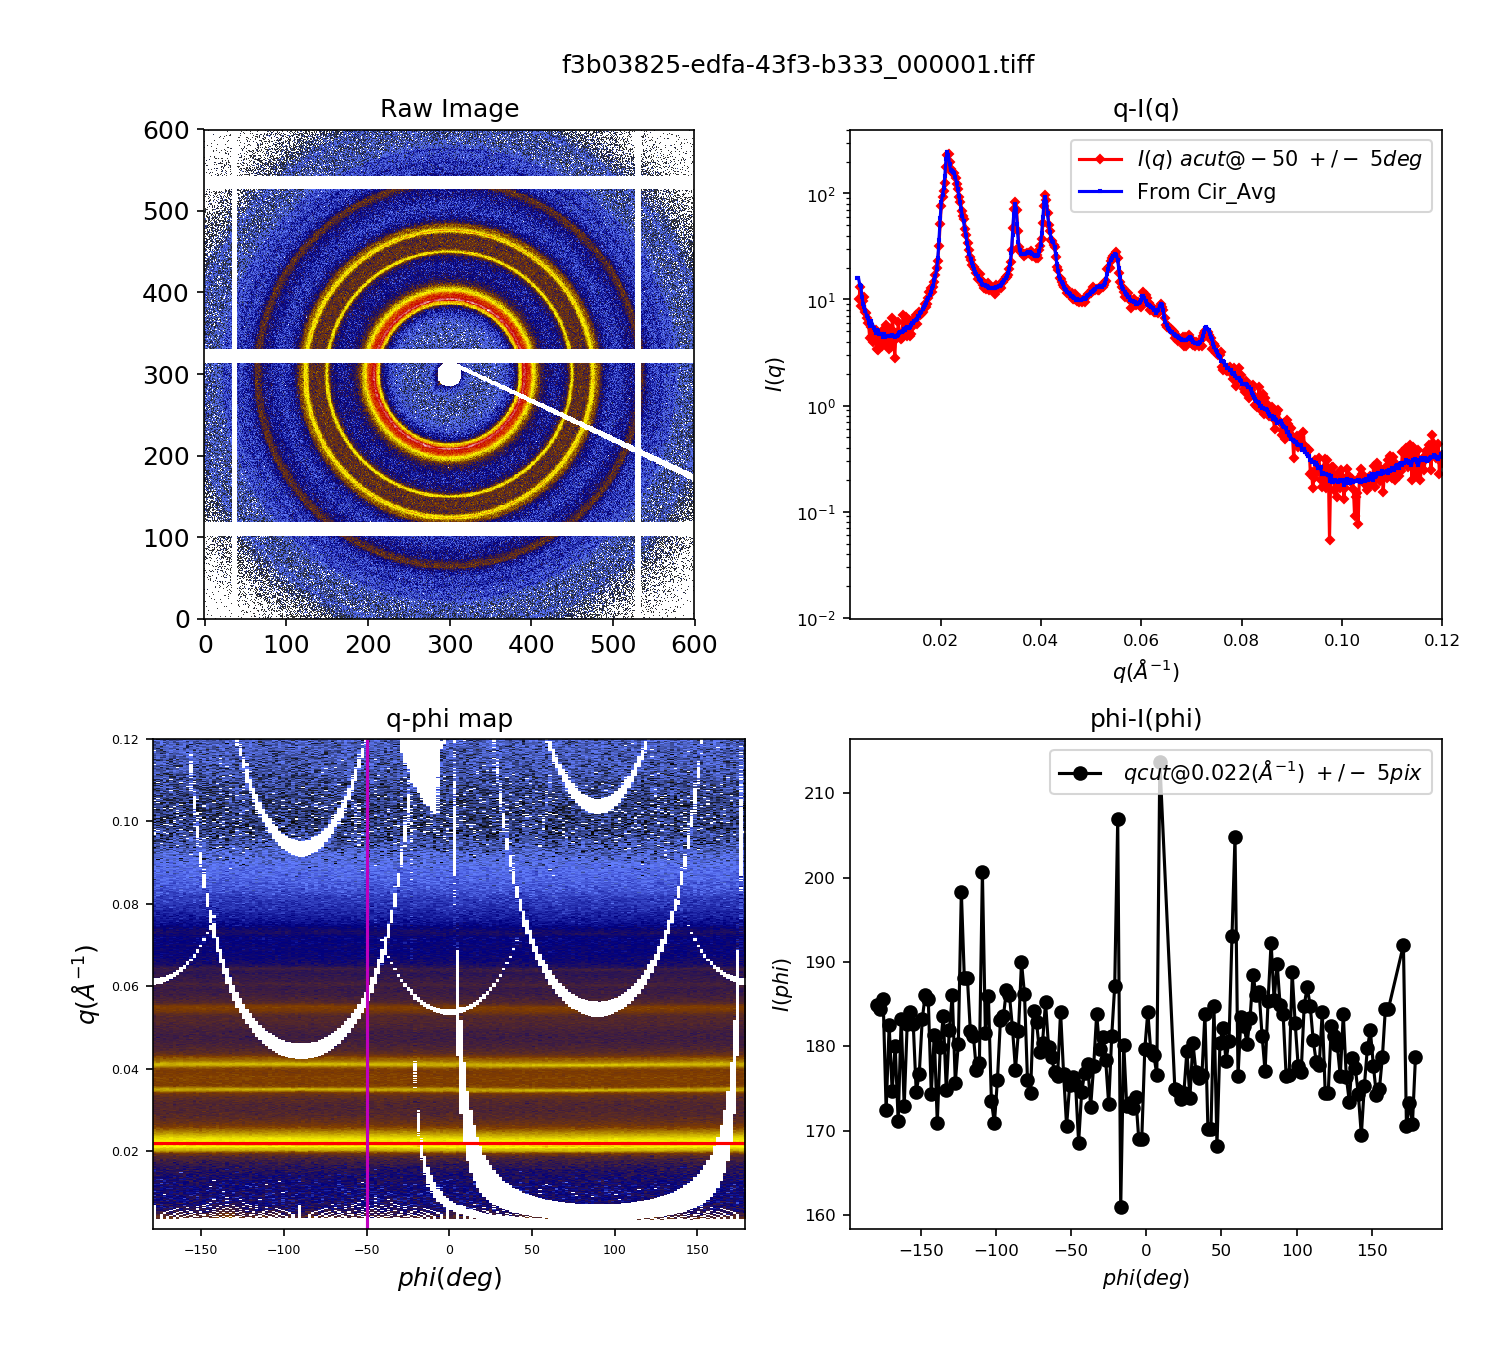

In [13]:
Plot_SAXS_Data_Reduction( md['fout']  ) 

### Label peaks for simple structures ( availabe phases: SC, BCC, FCC, HCP, NA (unknown) )

In [14]:
search_qmax_range = [0.01, 0.1 ]

In [15]:
q1, q2 = find_index( q, search_qmax_range[0]  ),  find_index( q,search_qmax_range[1]  )
qind_max = np.argmax( iq[q1 : q2 ] ) + q1
qpeak = q[ qind_max  ]   

In [16]:
phase = 'FCC'
phase = 'NA'

<IPython.core.display.Javascript object>


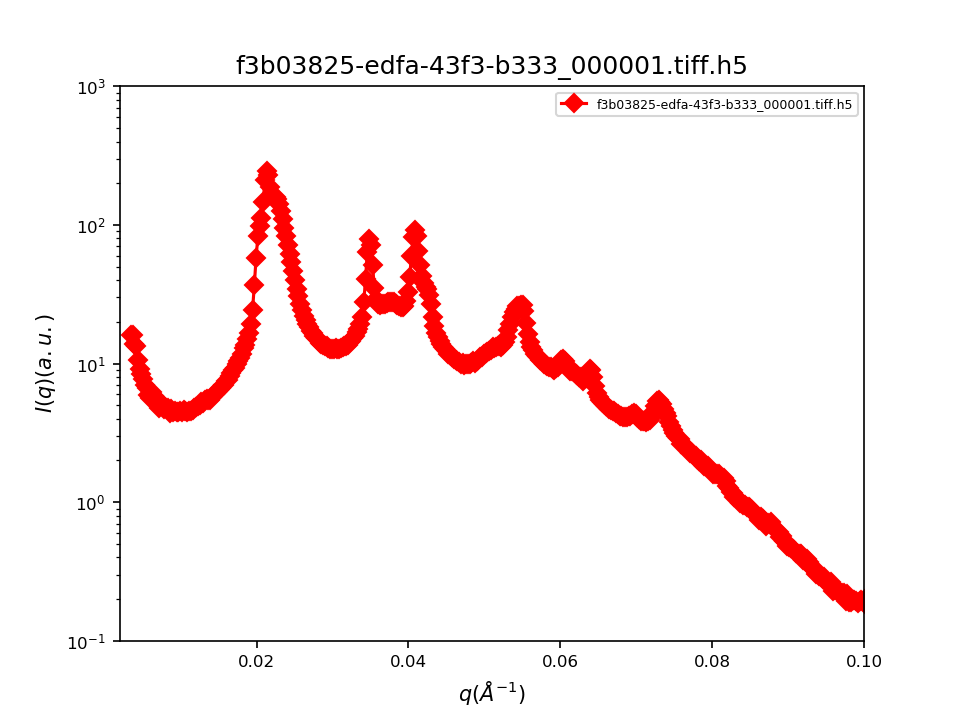

In [17]:
fig, ax = plt.subplots()
 
    
plot1D(x=q,y=   iq  , ax=ax, logy=True, c=colors[i], m= markers[i], legend=fp, xlim=[0.002,0.1],
       ylim=[1e-1, 1e3], legend_size=3) 
ax.set_xlabel( r'$q (\AA^{-1})$')
ax.set_ylabel(r'$I(q) (a.u.)$')
ax.set_title( fp)    
if phase!='NA':
    ax.vlines( Peak_Dict[phase]*qpeak, 0, 1e4, linestyle='--', color='k',  label= phase  )
ax.legend(loc = 'best', fontsize= 6 )


### Get Sq

* Plot pq and iq together

<IPython.core.display.Javascript object>


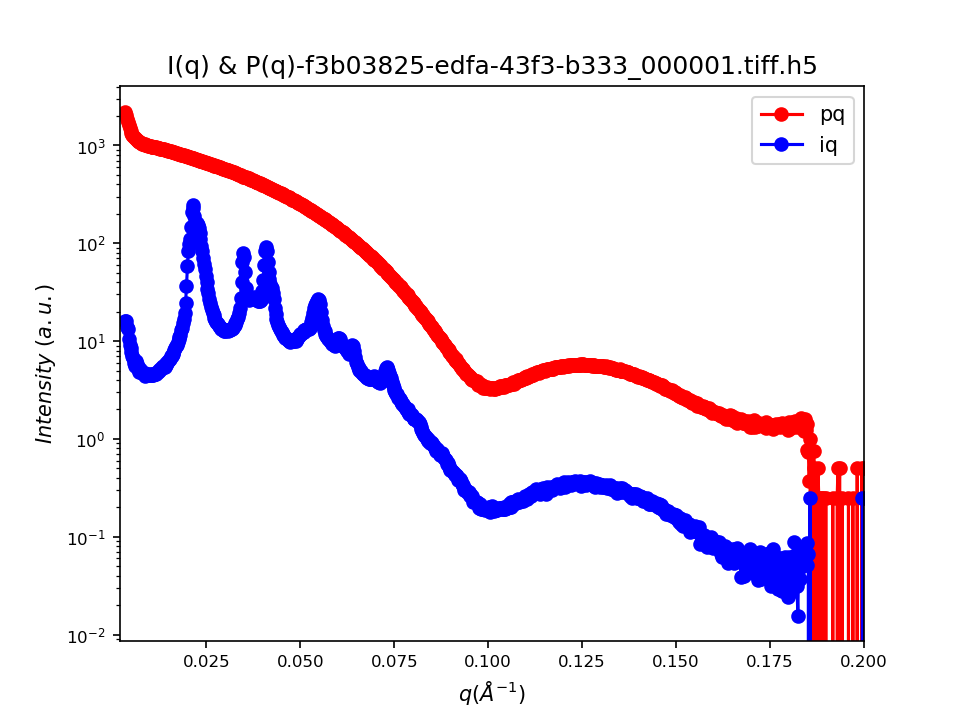

Text(0.5, 1.0, 'I(q) & P(q)-f3b03825-edfa-43f3-b333_000001.tiff.h5')

In [18]:
fig, ax = plt.subplots()
plot1D(x=q,y=pq  , ax=ax, logy=True, c='r', m='o', legend='pq')
plot1D(x=q,y=iq   , ax=ax, logy=True, c='b', m='o', legend='iq',  xlim=[0.002, 0.2],  )

ax.set_xlabel( r'$q (\AA^{-1})$')
ax.set_ylabel(r'$Intensity\ (a.u.)$')
ax.set_title( 'I(q) & P(q)-%s'%fp)

* Define parameters for the calculatoin of sq  

In [19]:
iq_bg = 0  #acount the background using a scalar
pq_bg = 0  #acount the background using a scalar
qstart_scale = 0.015  #qstart value for scale iq
qend_scale = 0.05     #qend value for scale iq
qstart_bg = 0.1          #qstart value for match iq and pq 
qend_bg = 0.18           #qstart value for match iq and pq 

qplot_range = [0.002, 0.18]
sqplot_range = [0.05, 5]
iqplot_range = [5e-1,1e4]


k for Sq scale is: 0.06995451521522048
background for Sq scale is: -0.6802372635275469
[0.5, 10000.0]


/home/yuzhang/Repos/pyScatt/pyScatt/saxs.py:343: RuntimeWarning: divide by zero encountered in true_divide
  sq = iq_/pq_


<IPython.core.display.Javascript object>


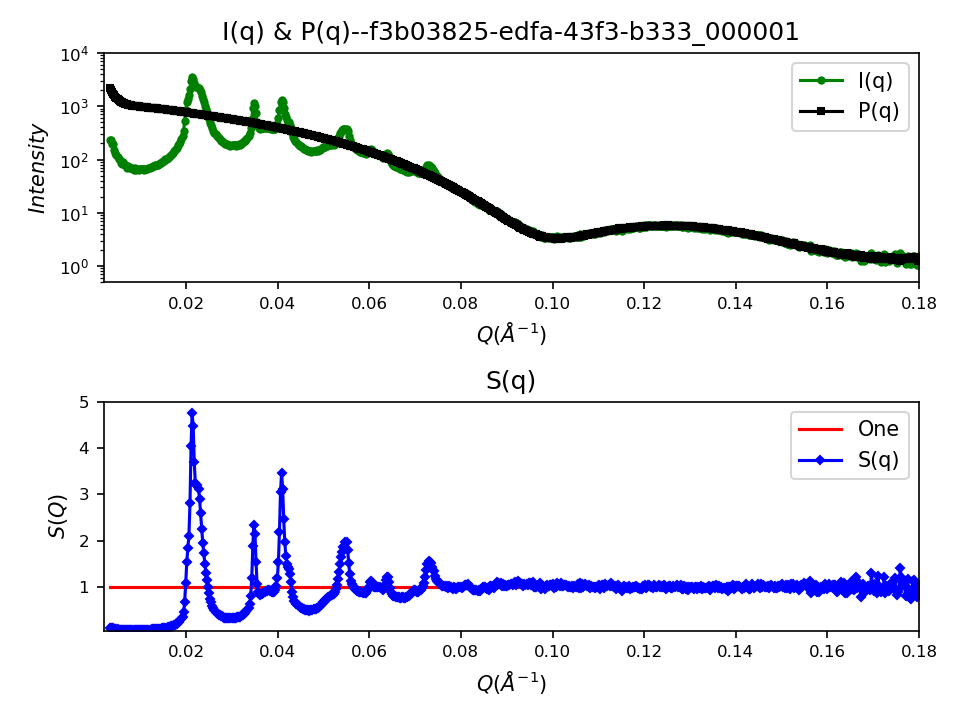

In [20]:
#y = np.interp(q2, q, iq) 
qX, SqX, iq_scaleX, pq_scaleX = get_Sq_from_Iq_Pq( q, iq + iq_bg , pq + pq_bg ,
                                                qstart_scale =qstart_scale,qend_scale=qend_scale,
                                                qstart_bg=qstart_bg, qend_bg= qend_bg) 
plot_iq_pq_sq( qX, iq_scaleX, pq_scaleX, SqX,xlim=qplot_range, 
              sq_limit=sqplot_range, iq_limit=iqplot_range,
              phase= phase, peak_int=[4 ],              
               title = fp[:-8], filename= outDir + 'Sq_%s'%fp[:] ,save= True )#False)#True)  
Res = dict( sq_saxs = SqX  )
export_dict_to_h5( Res, inDir + fp , overwrite= False ) 
 

In [21]:
saxs_data_analysis_pargs={}
saxs_data_analysis_pargs['form_factor_filename'] = form_factor_filename
saxs_data_analysis_pargs['iq_bg'] = iq_bg
saxs_data_analysis_pargs['pq_bg'] = pq_bg
saxs_data_analysis_pargs['qstart_scale'] = qstart_scale
saxs_data_analysis_pargs['qend_scale'] = qend_scale
saxs_data_analysis_pargs['qstart_bg'] =qstart_bg
saxs_data_analysis_pargs['qend_bg']  = qend_bg
saxs_data_analysis_pargs['outDir']= outDir


saxs_data_plot_pargs={}
saxs_data_plot_pargs['search_qmax_range'] =search_qmax_range
saxs_data_plot_pargs['phase']  = phase
saxs_data_plot_pargs['qplot_range'] = qplot_range
saxs_data_plot_pargs['sqplot_range'] =sqplot_range
saxs_data_plot_pargs['iqplot_range'] = iqplot_range
saxs_data_plot_pargs['outDir']= outDir

# Define the parameter for papermill

In [22]:
uid_list =  [ 'f3b03825-edfa-43f3-b333_000001.tiff.h5'    ]

In [23]:
#%run -i ~/pyScatt_link/pyScatt/saxs.py

## Get SQ for multi-data

0 f3b03825-edfa-43f3-b333_000001.tiff.h5
k for Sq scale is: 0.06995451521522048
background for Sq scale is: -0.6802372635275469
The Sq is sucessfully append to the h5 file: /home/yuzhang/XScattering/CFN_SAXS_Template/Results/f3b03825-edfa-43f3-b333_000001.tiff.h5.
[0.5, 10000.0]


<IPython.core.display.Javascript object>


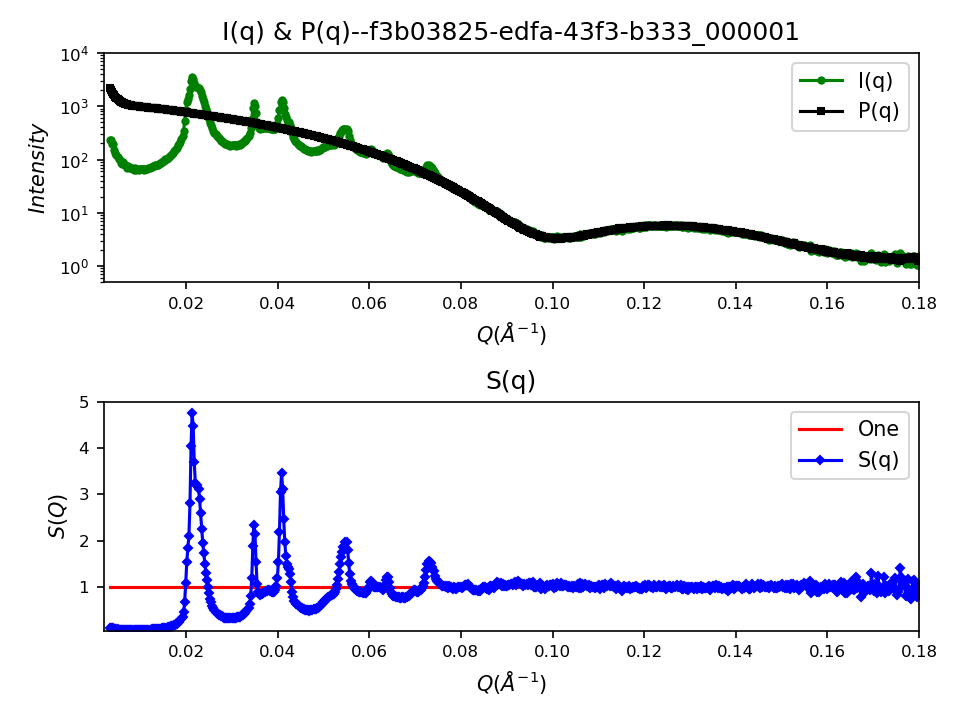

Total time: 0.591 sec


In [24]:
t0 = time.time() 
for i, fp in enumerate(uid_list ):      
    print(i, fp)
    #if True:
    try: 
        Run_SAXS_SQ_Data_Aanalysis( inDir + fp ,   saxs_data_analysis_pargs,    verbose=True,   ) 
        Plot_SAXS_SQ_Data_Aanalysis(  inDir + fp ,   saxs_data_plot_pargs    )

    except:
        print('Something wrong with this data: %s'%fp)
run_time( t0 )      

# The END!